In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis/')

In [2]:
gw1_v1_player_predictions = pd.read_parquet(r'data/gw_predictions/gw1_v1_player_predictions.parquet')
print(gw1_v1_player_predictions.shape)
gw1_v1_player_predictions.head()

(376, 8)


,name,position_DEF,position_FWD,position_GK,position_MID,predictions,team_name,next_match_value
0,sadio_mane,0,0,0,1,9.871607,Liverpool,11.5
1,mohamed_salah,0,0,0,1,8.533012,Liverpool,12.5
2,raheem_sterling,0,0,0,1,7.089328,Manchester City,12.0
3,pierre-emerick_aubameyang,0,1,0,0,6.396311,Arsenal,11.0
4,ayoze_perez,0,1,0,0,6.046611,Leicester City,6.5


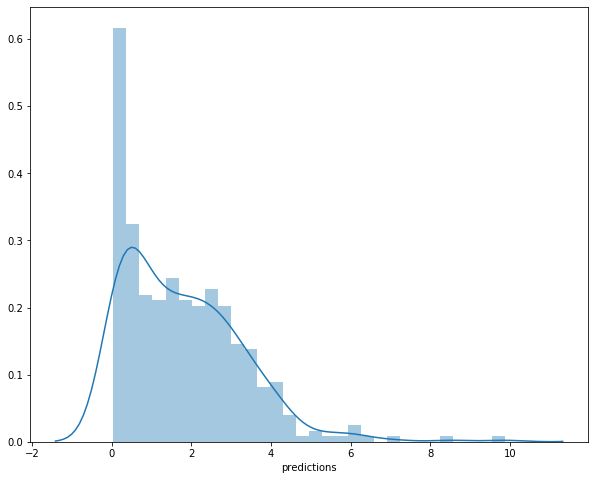

In [3]:
plt.figure(figsize=(10, 8))
sns.distplot(gw1_v1_player_predictions['predictions'], bins=30)

## Pick team

In [4]:
from pulp import *

In [5]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [6]:
team_names = gw1_v1_player_predictions['team_name'].unique()
gw1_v1_player_predictions = pd.get_dummies(gw1_v1_player_predictions, columns=['team_name'])
gw1_v1_player_predictions.head()

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,sadio_mane,0,0,0,1,9.871607,11.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mohamed_salah,0,0,0,1,8.533012,12.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,raheem_sterling,0,0,0,1,7.089328,12.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,pierre_emerick_aubameyang,0,1,0,0,6.396311,11.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ayoze_perez,0,1,0,0,6.046611,6.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Manual changes to positions (different to data):

# Changes to position
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'wilfried_zaha', 'position_MID'] = 1
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'wilfried_zaha', 'position_FWD'] = 0

gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'ayoze_perez', 'position_MID'] = 1
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'ayoze_perez', 'position_FWD'] = 0

gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'gerard_deulofeu', 'position_FWD'] = 1
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'gerard_deulofeu', 'position_MID'] = 0

# Team changes
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'tom_heaton', 'team_name_Burnley'] = 0
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'tom_heaton', 'team_name_Aston Villa'] = 1

# Drop players with less than 100 % chance of playing
gw1_v1_player_predictions = gw1_v1_player_predictions[gw1_v1_player_predictions['name'] != 'aymeric_laporte']
gw1_v1_player_predictions = gw1_v1_player_predictions[gw1_v1_player_predictions['name'] != 'sadio_mane']
gw1_v1_player_predictions = gw1_v1_player_predictions[gw1_v1_player_predictions['name'] != 'gerard_deulofeu']
gw1_v1_player_predictions = gw1_v1_player_predictions[gw1_v1_player_predictions['name'] != 'james_tarkowski']

In [8]:
players = list(gw1_v1_player_predictions['name'])

In [9]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            gw1_v1_player_predictions['name'],
            gw1_v1_player_predictions[f'team_name_{team}']
        )
    
    )

In [10]:
costs = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['next_match_value']
    )
)

In [11]:
predictions = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['predictions']
    )
)

In [12]:
DEF_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_FWD']
    )
)

GK_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_GK']
    )
)

MID_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_MID']
    )
)

In [13]:
prob = LpProblem('FPL team selection', LpMaximize)

In [14]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [15]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [16]:
# Constraints
prob += lpSum([costs[p] * player_vars[p] for p in players]) <= 100, "Total cost less than £100m"

prob += lpSum(player_vars[p] for p in players) == 15, "Select 15 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) == 5, "5 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 2, "2 goalkeepers"

prob += lpSum(MID_flag[p] * player_vars[p] for p in players) == 5, "5 midfielders"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) == 3, "3 forwards"

for team in team_dict.keys():
    prob += lpSum(team_dict[team][p] * player_vars[p] for p in players) <= 3, f"Max 3 players in the same {team}"

In [17]:
prob.solve()

1

In [18]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_abdoulaye_doucoure = 1.0
player_andrew_robertson = 1.0
player_ashley_barnes = 1.0
player_ayoze_perez = 1.0
player_callum_wilson = 1.0
player_hugo_lloris = 1.0
player_james_maddison = 1.0
player_joshua_king = 1.0
player_mohamed_salah = 1.0
player_nathan_ake = 1.0
player_nathan_redmond = 1.0
player_patrick_van_aanholt = 1.0
player_ricardo_domingos_barbosa_pereira = 1.0
player_tom_heaton = 1.0
player_trent_alexander_arnold = 1.0


In [19]:
test_selection = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
1,mohamed_salah,0,0,0,1,8.533012,12.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ayoze_perez,0,0,0,1,6.046611,6.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,callum_wilson,0,1,0,0,5.981546,8.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,trent_alexander_arnold,1,0,0,0,5.633724,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,andrew_robertson,1,0,0,0,4.901696,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,nathan_ake,1,0,0,0,4.423560,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14,abdoulaye_doucoure,0,0,0,1,4.421381,6.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,joshua_king,0,1,0,0,4.407183,6.5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,nathan_redmond,0,0,0,1,4.326617,6.5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18,james_maddison,0,0,0,1,4.237606,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_selection.sum()

name                                 mohamed_salahayoze_perezcallum_wilsontrent_ale...
position_DEF                                                                         5
position_FWD                                                                         3
position_GK                                                                          2
position_MID                                                                         5
predictions                                                                    72.3589
next_match_value                                                                   100
team_name_Arsenal                                                                    0
team_name_Aston Villa                                                                1
team_name_Bournemouth                                                                3
team_name_Brighton & Hove Albion                                                     0
team_name_Burnley                          

## Starting 11

In [21]:
players = list(test_selection['name'])

In [22]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            test_selection['name'],
            test_selection[f'team_name_{team}']
        )
    
    )

In [23]:
costs = dict(
    zip(
        test_selection['name'],
        test_selection['next_match_value']
    )
)

In [24]:
predictions = dict(
    zip(
        test_selection['name'],
        test_selection['predictions']
    )
)

In [25]:
DEF_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_FWD']
    )
)

GK_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_GK']
    )
)

MID_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_MID']
    )
)

In [26]:
prob = LpProblem('FPL team selection', LpMaximize)

In [27]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [28]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [29]:
# Constraints

prob += lpSum(player_vars[p] for p in players) == 11, "Select 11 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) >= 3, "At least 3 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 1, "1 goalkeeper"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) >= 1, "At least 1 forward"

In [30]:
prob.solve()

1

In [31]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_abdoulaye_doucoure = 1.0
player_andrew_robertson = 1.0
player_ayoze_perez = 1.0
player_callum_wilson = 1.0
player_hugo_lloris = 1.0
player_james_maddison = 1.0
player_joshua_king = 1.0
player_mohamed_salah = 1.0
player_nathan_ake = 1.0
player_nathan_redmond = 1.0
player_trent_alexander_arnold = 1.0


In [32]:
test_selection_11 = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection_11

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
1,mohamed_salah,0,0,0,1,8.533012,12.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ayoze_perez,0,0,0,1,6.046611,6.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,callum_wilson,0,1,0,0,5.981546,8.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,trent_alexander_arnold,1,0,0,0,5.633724,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,andrew_robertson,1,0,0,0,4.901696,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,nathan_ake,1,0,0,0,4.423560,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14,abdoulaye_doucoure,0,0,0,1,4.421381,6.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,joshua_king,0,1,0,0,4.407183,6.5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,nathan_redmond,0,0,0,1,4.326617,6.5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18,james_maddison,0,0,0,1,4.237606,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test_selection[test_selection['name'] != 'mohamed_salah']['predictions'].sum() + test_selection[test_selection['name'] == 'mohamed_salah']['predictions'].sum() * 2

80.89187863800674

In [34]:
test_selection_11 = test_selection_11.reset_index(drop=True)[['name']]
test_selection_11['starting_11'] = 1
test_selection_11

,name,starting_11
0,mohamed_salah,1
1,ayoze_perez,1
2,callum_wilson,1
3,trent_alexander_arnold,1
4,andrew_robertson,1
5,nathan_ake,1
6,abdoulaye_doucoure,1
7,joshua_king,1
8,nathan_redmond,1
9,james_maddison,1


In [35]:
gw_selection_df = test_selection.merge(
    test_selection_11,
    on=['name'],
    how='left'
)
gw_selection_df['starting_11'] = gw_selection_df['starting_11'].fillna(0)
gw_selection_df

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,...,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,mohamed_salah,0,0,0,1,8.533012,12.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,ayoze_perez,0,0,0,1,6.046611,6.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,callum_wilson,0,1,0,0,5.981546,8.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
3,trent_alexander_arnold,1,0,0,0,5.633724,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,andrew_robertson,1,0,0,0,4.901696,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,nathan_ake,1,0,0,0,4.423560,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
6,abdoulaye_doucoure,0,0,0,1,4.421381,6.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
7,joshua_king,0,1,0,0,4.407183,6.5,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
8,nathan_redmond,0,0,0,1,4.326617,6.5,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
9,james_maddison,0,0,0,1,4.237606,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [36]:
gw_selection_df.to_parquet(r'data/gw_team_selections/gw1_v1_team_selections.parquet', index=False)